In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '7'

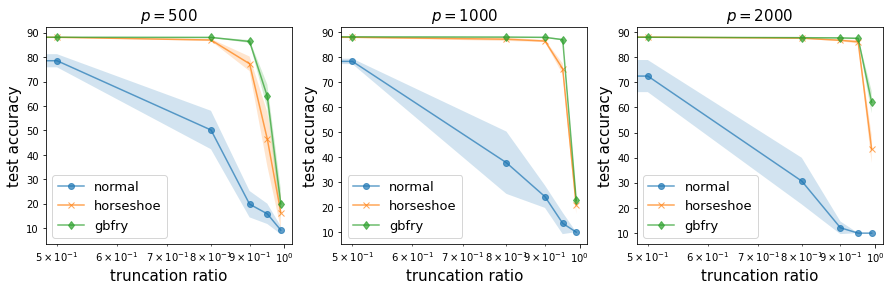

In [2]:
# accuracy
acc = torch.load('results/trunc_acc.data')
p_list = [500, 1000, 2000]
q_list = [0.0, 0.5, 0.8, 0.9, 0.95, 0.99]
acc_mean = {}
acc_std = {}
for key in acc.keys():
    acc_mean[key] = np.zeros((len(p_list), len(q_list)))
    acc_std[key] = np.zeros((len(p_list), len(q_list)))        
    for i, p in enumerate(p_list):
        for j in range(len(q_list)):
            acc_mean[key][i][j] = acc[key][i,j].mean()
            acc_std[key][i][j] = acc[key][i,j].std()        

markers = ['o', 'x', 'd']
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for i, p in enumerate(p_list):    
    axes[i].set_title(rf'$p={p}$', fontsize=15)
    for marker, key in zip(markers, acc.keys()):
        axes[i].fill_between(q_list, 
                         acc_mean[key][i]-acc_std[key][i],
                         acc_mean[key][i]+acc_std[key][i], alpha=0.2)
        axes[i].plot(q_list, acc_mean[key][i], label=key, alpha=0.7, marker=marker)
    axes[i].set_xticks(q_list)
    axes[i].set_xscale('log')
    axes[i].set_xlabel('truncation ratio', fontsize=15)
    axes[i].set_ylabel('test accuracy', fontsize=15)
    axes[i].legend(fontsize=13)  
plt.show()

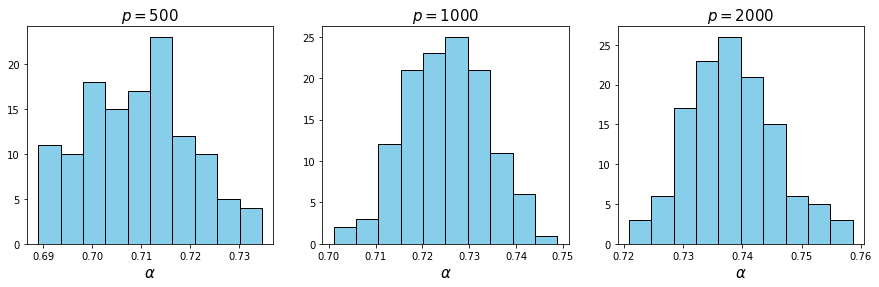

In [3]:
alphas = torch.load('results/alphas.data')
p_list = [500, 1000, 2000]
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for i, p in enumerate(p_list):
    axes[i].hist(alphas[p], edgecolor='k', facecolor='skyblue')
    axes[i].set_title(rf'$p={p}$', fontsize=15)
    axes[i].set_xlabel(rf'$\alpha$', fontsize=15)
plt.show()

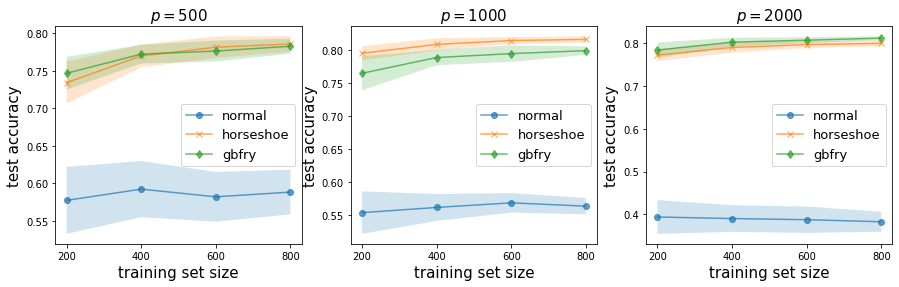

In [5]:
features = torch.load('results/features.data')
transfer_acc = features['acc']
markers = ['o', 'x', 'd']
fig, axes = plt.subplots(1, 3, figsize=(15,4))
p_list = [500, 1000, 2000]
model_list = ['normal', 'horseshoe', 'gbfry']
num_trains = [200, 400, 600, 800]
for i, p in enumerate(p_list):    
    axes[i].set_title(rf'$p={p}$', fontsize=15)
    for marker, model in zip(markers, model_list):        
        acc_mean = transfer_acc[model][i,:,:,:,1].mean((-2,-1))
        acc_std = transfer_acc[model][i,:,:,:,1].std((-2,-1))
        axes[i].fill_between(num_trains, acc_mean-acc_std, acc_mean+acc_std, alpha=0.2)
        axes[i].plot(num_trains, acc_mean, alpha=0.7, marker=marker, label=model)
    axes[i].set_xticks(num_trains)    
    axes[i].set_xlabel('training set size', fontsize=15)
    axes[i].set_ylabel('test accuracy', fontsize=15)
    axes[i].legend(fontsize=13) 
plt.show()     
           